In [0]:
# https://www.datacamp.com/courses/machine-learning-with-tree-based-models-in-python

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error as MSE
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import  LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor

**Course Description**

Decision trees are supervised learning models used for problems involving classification and regression. Tree models present a high flexibility that comes at a price: on one hand, **trees are able to capture complex non-linear relationships**; on the other hand, they are prone to memorizing the noise present in a dataset. By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise. Ensemble methods are used across a variety of fields and have a proven track record of winning many machine learning competitions. 

- In this course, you'll learn how to use Python to train decision trees and tree-based models with the user-friendly scikit-learn machine learning library. 
- You'll understand the advantages and shortcomings of trees and demonstrate how ensembling can alleviate these shortcomings, all while practicing on real-world datasets. 
- Finally, you'll also understand how to tune the most influential hyperparameters in order to get the most out of your models.


## 1. Classification and Regression Tree

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

#### Decision tree for classification

**Train your first classification tree**

In this exercise you'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

In [0]:
cancer = pd.read_csv('wbc.csv')
print('breast cancer df shape: ', cancer.shape)
cancer.head(5)

breast cancer df shape:  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
cancer['y'] = 1
# replace Benign with 0
cancer.loc[cancer['diagnosis'] == 'B', 'y'] = 0 
# cancer.y

In [0]:
cols_X = ['radius_mean', 'concave points_mean']
cols_y = ['y']

In [0]:
#@title
idx_train = [195,
 560,
 544,
 495,
 527,
 222,
 341,
 449,
 199,
 17,
 315,
 182,
 552,
 491,
 189,
 285,
 161,
 32,
 128,
 509,
 274,
 547,
 209,
 97,
 99,
 13,
 309,
 455,
 353,
 38,
 248,
 483,
 381,
 75,
 233,
 355,
 270,
 408,
 402,
 21,
 36,
 396,
 421,
 380,
 204,
 476,
 291,
 281,
 275,
 62,
 74,
 290,
 67,
 300,
 262,
 106,
 422,
 282,
 545,
 457,
 59,
 444,
 169,
 66,
 461,
 339,
 51,
 371,
 230,
 310,
 555,
 107,
 524,
 152,
 127,
 443,
 19,
 238,
 508,
 499,
 404,
 112,
 52,
 202,
 61,
 144,
 117,
 440,
 188,
 271,
 170,
 260,
 264,
 374,
 306,
 247,
 210,
 426,
 549,
 520,
 328,
 391,
 526,
 503,
 474,
 320,
 564,
 427,
 91,
 423,
 494,
 129,
 478,
 187,
 521,
 159,
 305,
 451,
 93,
 16,
 439,
 530,
 500,
 287,
 83,
 231,
 22,
 352,
 115,
 265,
 184,
 236,
 463,
 324,
 241,
 529,
 331,
 26,
 10,
 557,
 346,
 546,
 218,
 224,
 205,
 425,
 366,
 338,
 313,
 65,
 55,
 400,
 376,
 185,
 407,
 130,
 191,
 121,
 403,
 539,
 373,
 176,
 393,
 276,
 420,
 358,
 345,
 430,
 362,
 432,
 414,
 82,
 395,
 104,
 567,
 9,
 473,
 216,
 496,
 343,
 42,
 172,
 295,
 228,
 175,
 458,
 259,
 73,
 475,
 428,
 207,
 266,
 213,
 465,
 68,
 158,
 437,
 110,
 507,
 200,
 333,
 479,
 100,
 225,
 502,
 340,
 45,
 326,
 70,
 28,
 308,
 171,
 365,
 136,
 388,
 114,
 263,
 387,
 8,
 330,
 108,
 7,
 279,
 558,
 23,
 523,
 517,
 548,
 317,
 148,
 294,
 208,
 516,
 363,
 559,
 411,
 297,
 72,
 272,
 60,
 344,
 566,
 124,
 348,
 370,
 433,
 466,
 336,
 47,
 390,
 58,
 375,
 227,
 125,
 137,
 378,
 135,
 561,
 318,
 150,
 12,
 382,
 118,
 25,
 482,
 514,
 140,
 417,
 24,
 531,
 292,
 484,
 327,
 383,
 249,
 192,
 361,
 456,
 351,
 139,
 447,
 56,
 156,
 94,
 53,
 543,
 145,
 269,
 512,
 322,
 528,
 232,
 34,
 46,
 513,
 535,
 113,
 14,
 181,
 533,
 350,
 221,
 413,
 334,
 80,
 510,
 481,
 79,
 0,
 198,
 49,
 162,
 258,
 252,
 454,
 568,
 234,
 165,
 71,
 392,
 342,
 501,
 445,
 86,
 335,
 563,
 316,
 126,
 359,
 15,
 394,
 143,
 48,
 194,
 44,
 203,
 556,
 424,
 490,
 354,
 369,
 489,
 312,
 497,
 462,
 562,
 54,
 88,
 141,
 190,
 142,
 242,
 3,
 498,
 39,
 78,
 157,
 431,
 504,
 105,
 319,
 250,
 69,
 296,
 487,
 459,
 416,
 168,
 180,
 240,
 367,
 243,
 215,
 132,
 480,
 506,
 223,
 87,
 153,
 525,
 298,
 472,
 96,
 419,
 515,
 109,
 163,
 409,
 229,
 438,
 166,
 206,
 493,
 253,
 349,
 43,
 347,
 77,
 293,
 90,
 149,
 329,
 134,
 27,
 325,
 89,
 441,
 485,
 1,
 173,
 131,
 102,
 550,
 442,
 211,
 453,
 246,
 468,
 435,
 64,
 98,
 33,
 401,
 542,
 267,
 405,
 554,
 302,
 256,
 307,
 337,
 261,
 4,
 311,
 133,
 397,
 146,
 398,
 119,
 217,
 492,
 538,
 183,
 138,
 537,
 5,
 101,
 116,
 360,
 301,
 406,
 164,
 536,
 219,
 284]

print('train index shape: ', len(idx_train))

train index shape:  455


In [0]:
#@title
idx_test = [196,
 120,
 151,
 280,
 288,
 201,
 323,
 18,
 534,
 522,
 251,
 412,
 257,
 220,
 372,
 41,
 519,
 278,
 85,
 450,
 167,
 314,
 464,
 197,
 30,
 488,
 303,
 20,
 357,
 299,
 245,
 553,
 399,
 415,
 511,
 452,
 40,
 63,
 386,
 2,
 11,
 541,
 448,
 356,
 235,
 179,
 283,
 237,
 565,
 123,
 321,
 193,
 368,
 477,
 551,
 147,
 255,
 6,
 286,
 518,
 50,
 95,
 239,
 178,
 377,
 122,
 29,
 289,
 469,
 434,
 505,
 410,
 254,
 385,
 57,
 177,
 486,
 418,
 277,
 76,
 160,
 304,
 92,
 81,
 268,
 244,
 364,
 174,
 460,
 31,
 379,
 84,
 446,
 389,
 470,
 103,
 532,
 273,
 111,
 154,
 332,
 37,
 155,
 214,
 226,
 436,
 212,
 186,
 384,
 429,
 467,
 540,
 471,
 35]

print('test index shape: ', len(idx_test))

test index shape:  114


In [0]:
X_train = cancer[cols_X].iloc[idx_train]
X_test = cancer[cols_X].iloc[idx_test]
y_train = cancer[cols_y].iloc[idx_train]
y_test = cancer[cols_y].iloc[idx_test]

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (455, 2)
X_test shape:  (114, 2)
y_train shape:  (455, 1)
y_test shape:  (114, 1)


In [0]:
SEED = 1

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where **class 1** corresponds to a **malignant** tumor and **class 0** corresponds to a **benign** tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [0]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [0]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

In [0]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


**Evaluate the classification tree**

Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

In [0]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

In [0]:
# Predict test set labels
y_pred = dt.predict(X_test)

In [0]:
# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


**Logistic regression vs classification tree**

A classification tree divides the feature space into **rectangular regions**. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

In [0]:
#@title
def plot_decision_regions(X, y, clf,
                          feature_index=None,
                          filler_feature_values=None,
                          filler_feature_ranges=None,
                          ax=None,
                          X_highlight=None,
                          res=0.02, legend=1,
                          hide_spines=True,
                          markers='s^oxv<>',
                          colors='red,blue,limegreen,gray,cyan'):
    """Plot decision regions of a classifier.

    Please note that this functions assumes that class labels are
    labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
    labels with integer labels > 4, you may want to provide additional colors
    and/or markers as `colors` and `markers` arguments.
    See http://matplotlib.org/examples/color/named_colors.html for more
    information.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Feature Matrix.
    y : array-like, shape = [n_samples]
        True class labels.
    clf : Classifier object.
        Must have a .predict method.
    feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
        Feature indices to use for plotting. The first index in
        `feature_index` will be on the x-axis, the second index will be
        on the y-axis.
    filler_feature_values : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted.
    filler_feature_ranges : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted. Will use the
        ranges provided to select training samples for plotting.
    ax : matplotlib.axes.Axes (default: None)
        An existing matplotlib Axes. Creates
        one if ax=None.
    X_highlight : array-like, shape = [n_samples, n_features] (default: None)
        An array with data points that are used to highlight samples in `X`.
    res : float or array-like, shape = (2,) (default: 0.02)
        Grid width. If float, same resolution is used for both the x- and
        y-axis. If array-like, the first item is used on the x-axis, the
        second is used on the y-axis. Lower values increase the resolution but
        slow down the plotting.
    hide_spines : bool (default: True)
        Hide axis spines if True.
    legend : int (default: 1)
        Integer to specify the legend location.
        No legend if legend is 0.
    markers : str (default 's^oxv<>')
        Scatterplot markers.
    colors : str (default 'red,blue,limegreen,gray,cyan')
        Comma separated list of colors.

    Returns
    ---------
    ax : matplotlib.axes.Axes object

    """

    check_Xy(X, y, y_int=True)  # Validate X and y arrays
    dim = X.shape[1]

    if ax is None:
        ax = plt.gca()

    if isinstance(res, float):
        xres, yres = res, res
    else:
        try:
            xres, yres = res
        except ValueError:
            raise ValueError('Unable to unpack res. Expecting '
                             'array-like input of length 2.')

    plot_testdata = True
    if not isinstance(X_highlight, np.ndarray):
        if X_highlight is not None:
            raise ValueError('X_highlight must be a NumPy array or None')
        else:
            plot_testdata = False
    elif len(X_highlight.shape) < 2:
        raise ValueError('X_highlight must be a 2D array')

    if feature_index is not None:
        # Unpack and validate the feature_index values
        if dim == 1:
            raise ValueError(
                'feature_index requires more than one training feature')
        try:
            x_index, y_index = feature_index
        except ValueError:
            raise ValueError(
                'Unable to unpack feature_index. Make sure feature_index '
                'only has two dimensions.')
        try:
            X[:, x_index], X[:, y_index]
        except IndexError:
            raise IndexError(
                'feature_index values out of range. X.shape is {}, but '
                'feature_index is {}'.format(X.shape, feature_index))
    else:
        feature_index = (0, 1)
        x_index, y_index = feature_index

    # Extra input validation for higher number of training features
    if dim > 2:
        if filler_feature_values is None:
            raise ValueError('Filler values must be provided when '
                             'X has more than 2 training features.')

        if filler_feature_ranges is not None:
            if not set(filler_feature_values) == set(filler_feature_ranges):
                raise ValueError(
                    'filler_feature_values and filler_feature_ranges must '
                    'have the same keys')

        # Check that all columns in X are accounted for
        column_check = np.zeros(dim, dtype=bool)
        for idx in filler_feature_values:
            column_check[idx] = True
        for idx in feature_index:
            column_check[idx] = True
        if not all(column_check):
            missing_cols = np.argwhere(~column_check).flatten()
            raise ValueError(
                'Column(s) {} need to be accounted for in either '
                'feature_index or filler_feature_values'.format(missing_cols))

    marker_gen = cycle(list(markers))

    n_classes = np.unique(y).shape[0]
    colors = colors.split(',')
    colors_gen = cycle(colors)
    colors = [next(colors_gen) for c in range(n_classes)]

    # Get minimum and maximum
    x_min, x_max = X[:, x_index].min() - 1, X[:, x_index].max() + 1
    if dim == 1:
        y_min, y_max = -1, 1
    else:
        y_min, y_max = X[:, y_index].min() - 1, X[:, y_index].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, xres),
                         np.arange(y_min, y_max, yres))

    if dim == 1:
        X_predict = np.array([xx.ravel()]).T
    else:
        X_grid = np.array([xx.ravel(), yy.ravel()]).T
        X_predict = np.zeros((X_grid.shape[0], dim))
        X_predict[:, x_index] = X_grid[:, 0]
        X_predict[:, y_index] = X_grid[:, 1]
        if dim > 2:
            for feature_idx in filler_feature_values:
                X_predict[:, feature_idx] = filler_feature_values[feature_idx]
    Z = clf.predict(X_predict)
    Z = Z.reshape(xx.shape)
    # Plot decisoin region
    ax.contourf(xx, yy, Z,
                alpha=0.3,
                colors=colors,
                levels=np.arange(Z.max() + 2) - 0.5)

    ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())

    # Scatter training data samples
    for idx, c in enumerate(np.unique(y)):
        if dim == 1:
            y_data = [0 for i in X[y == c]]
            x_data = X[y == c]
        elif dim == 2:
            y_data = X[y == c, y_index]
            x_data = X[y == c, x_index]
        elif dim > 2 and filler_feature_ranges is not None:
            class_mask = y == c
            feature_range_mask = get_feature_range_mask(
                            X, filler_feature_values=filler_feature_values,
                            filler_feature_ranges=filler_feature_ranges)
            y_data = X[class_mask & feature_range_mask, y_index]
            x_data = X[class_mask & feature_range_mask, x_index]
        else:
            continue

        ax.scatter(x=x_data,
                   y=y_data,
                   alpha=0.8,
                   c=colors[idx],
                   marker=next(marker_gen),
                   edgecolor='black',
                   label=c)

    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if dim == 1:
        ax.axes.get_yaxis().set_ticks([])

    if legend:
        if dim > 2 and filler_feature_ranges is None:
            pass
        else:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels,
                      framealpha=0.3, scatterpoints=1, loc=legend)

    if plot_testdata:
        if dim == 1:
            x_data = X_highlight
            y_data = [0 for i in X_highlight]
        elif dim == 2:
            x_data = X_highlight[:, x_index]
            y_data = X_highlight[:, y_index]
        else:
            feature_range_mask = get_feature_range_mask(
                    X_highlight, filler_feature_values=filler_feature_values,
                    filler_feature_ranges=filler_feature_ranges)
            y_data = X_highlight[feature_range_mask, y_index]
            x_data = X_highlight[feature_range_mask, x_index]

        ax.scatter(x_data,
                   y_data,
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidths=1,
                   marker='o',
                   s=80)

    return ax

In [0]:
def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

We have written a custom function called `plot_labeled_decision_regions()` that you can use to plot the decision regions of a list containing two trained classifiers. You can type `help(plot_labeled_decision_regions)` in the IPython shell to learn more about this function.

In [0]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [0]:
# Instatiate logreg
logreg = LogisticRegression(random_state=1)

In [0]:
# Fit logreg to the training set
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

In [0]:
#  y has to be a pandas Series corresponding to the labels.
y_test = y_test['y']

NameError: ignored

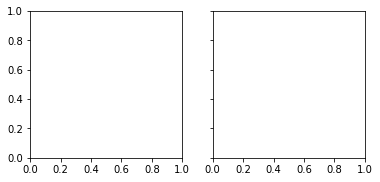

In [0]:
# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

#### Classification tree Learning

**Using entropy as a criterion**

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

In [0]:
cols_new = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [0]:
y_train = y_train['y']

In [0]:
X_train = cancer[cols_new].iloc[idx_train]
X_test = cancer[cols_new].iloc[idx_test]

print('X_train shape: ', X_train.shape) # (455, 30)
print('X_test shape: ', X_test.shape)

X_train shape:  (455, 30)
X_test shape:  (114, 30)


In [0]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [0]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

In [0]:
# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

**Entropy vs Gini index**

In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

In [0]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
accuracy_gini = accuracy_score(y_test, y_pred)

X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are available in your workspace.

In [0]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

In [0]:
# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

In [0]:
# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

In [0]:
# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

Accuracy achieved by using entropy:  0.9298245614035088


In [0]:
# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using the gini index:  0.9298245614035088


Notice how the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

#### Decision tree for regression

**Train your first regression tree**

In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

In [0]:
mpg = pd.read_csv('auto.csv')
print('mpg df dimension: ', mpg.shape)
mpg.head(5)

mpg df dimension:  (392, 7)


,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [0]:
mpg['origin_Asia'] = 0
mpg.loc[mpg['origin'] == 'Asia', 'origin_Asia'] = 1
mpg['origin_Europe'] = 0
mpg.loc[mpg['origin'] == 'Europe', 'origin_Europe'] = 1
mpg['origin_US'] = 0
mpg.loc[mpg['origin'] == 'US', 'origin_US'] = 1

In [0]:
del mpg['origin']
mpg.head(5)

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [0]:
cols = ['displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia',
       'origin_Europe', 'origin_US']

In [0]:
#@title
train_idx = [305,
 338,
 23,
 214,
 112,
 388,
 228,
 349,
 375,
 59,
 50,
 38,
 166,
 194,
 372,
 80,
 313,
 251,
 5,
 75,
 14,
 47,
 46,
 123,
 217,
 79,
 195,
 30,
 204,
 345,
 185,
 101,
 159,
 157,
 25,
 246,
 67,
 224,
 236,
 231,
 65,
 247,
 309,
 317,
 70,
 180,
 103,
 319,
 136,
 382,
 378,
 68,
 155,
 77,
 303,
 199,
 58,
 125,
 42,
 4,
 121,
 343,
 146,
 310,
 250,
 109,
 118,
 229,
 6,
 238,
 234,
 244,
 188,
 193,
 189,
 211,
 383,
 3,
 384,
 122,
 78,
 64,
 18,
 151,
 380,
 43,
 278,
 163,
 260,
 140,
 369,
 385,
 266,
 291,
 240,
 168,
 323,
 45,
 284,
 143,
 225,
 227,
 197,
 21,
 290,
 108,
 177,
 57,
 296,
 299,
 387,
 391,
 170,
 29,
 162,
 149,
 366,
 357,
 94,
 218,
 355,
 292,
 132,
 187,
 89,
 237,
 34,
 72,
 354,
 294,
 139,
 381,
 367,
 111,
 324,
 12,
 87,
 198,
 213,
 370,
 332,
 164,
 175,
 389,
 306,
 96,
 205,
 374,
 41,
 63,
 222,
 196,
 248,
 13,
 262,
 179,
 17,
 233,
 11,
 280,
 207,
 90,
 51,
 85,
 124,
 161,
 88,
 287,
 344,
 95,
 270,
 39,
 86,
 181,
 265,
 116,
 145,
 158,
 321,
 311,
 286,
 272,
 200,
 71,
 301,
 330,
 282,
 327,
 365,
 304,
 133,
 60,
 314,
 377,
 100,
 19,
 302,
 364,
 264,
 276,
 8,
 92,
 252,
 32,
 135,
 22,
 62,
 379,
 215,
 325,
 334,
 257,
 52,
 326,
 173,
 35,
 178,
 167,
 226,
 120,
 275,
 44,
 300,
 76,
 208,
 212,
 267,
 216,
 342,
 9,
 320,
 359,
 285,
 295,
 104,
 312,
 341,
 386,
 91,
 182,
 315,
 358,
 172,
 232,
 36,
 156,
 2,
 242,
 308,
 289,
 48,
 141,
 223,
 183,
 331,
 348,
 160,
 219,
 99,
 235,
 117,
 1,
 113,
 368,
 174,
 253,
 347,
 184,
 165,
 274,
 192,
 0,
 54,
 28,
 206,
 49,
 350,
 20,
 293,
 176,
 335,
 33,
 171,
 7,
 318,
 390,
 106,
 97,
 110,
 360,
 69,
 346,
 129,
 316,
 258,
 322,
 150,
 337,
 26,
 93,
 148,
 119,
 138,
 169,
 363,
 202,
 147,
 277,
 256,
 131,
 249,
 152,
 362]


In [0]:
#@title
test_idx = [352,
 16,
 288,
 281,
 201,
 144,
 283,
 329,
 254,
 154,
 73,
 297,
 273,
 220,
 209,
 243,
 37,
 55,
 361,
 142,
 56,
 115,
 15,
 40,
 336,
 261,
 339,
 102,
 269,
 24,
 203,
 186,
 356,
 298,
 81,
 351,
 376,
 268,
 134,
 307,
 31,
 83,
 255,
 191,
 263,
 66,
 271,
 61,
 245,
 98,
 333,
 128,
 107,
 27,
 153,
 105,
 230,
 114,
 353,
 328,
 279,
 84,
 210,
 371,
 137,
 239,
 259,
 373,
 127,
 130,
 82,
 53,
 340,
 241,
 10,
 126,
 74,
 190,
 221]

In [0]:
X_train = mpg[cols].iloc[train_idx]
y_train = mpg['mpg'].iloc[train_idx]
X_test = mpg[cols].iloc[test_idx]
y_test = mpg['mpg'].iloc[test_idx]

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (313, 8)
X_test shape:  (79, 8)
y_train shape:  (313,)
y_test shape:  (79,)


The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [0]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

In [0]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

In [0]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.13,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

**Evaluate the regression tree**

In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (**RMSE**) metric. The RMSE of a model measures, on average, **how much the model's predictions differ from the actual labels**. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

In [0]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

In [0]:
# Compute y_pred
y_pred = dt.predict(X_test)

In [0]:
# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

In [0]:
# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

In [0]:
# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


**Linear regression vs regression tree**

In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

In [0]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

In [0]:
# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

In [0]:
# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

In [0]:
# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

Linear Regression test set RMSE: 5.10


In [0]:
# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

## 2. The Bias-Variance Tradeoff

The bias-variance tradeoff is one of the fundamental concepts in supervised machine learning. In this chapter, you'll understand how to diagnose the problems of overfitting and underfitting. You'll also be introduced to the concept of ensembling where the predictions of several models are aggregated to produce predictions that are more robust.

#### Generalization Error

**Complexity, bias and variance**

As the complexity of a model increases, the bias term decreases while the variance term increases. 

#### Diagnose bias and variance problems

**Instantiate the model**

In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to **predict the mpg consumption** of cars from the auto dataset using all available features.

In [0]:
mpg.head(5)

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [0]:
y = mpg['mpg']
X = mpg.drop(['mpg'], axis=1)

In [0]:
X.head(5)

,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,250.0,88,3139,14.5,15.0,0,0,1
1,304.0,193,4732,18.5,20.0,0,0,1
2,91.0,60,1800,16.4,10.0,1,0,0
3,250.0,98,3525,19.0,15.0,0,0,1
4,97.0,78,2188,15.8,10.0,0,1,0


In [0]:
y.head(5)

0    18.0
1     9.0
2    36.1
3    18.5
4    34.3
Name: mpg, dtype: float64

We have already processed the data and loaded the features matrix X and the array y in your workspace. In addition, the DecisionTreeRegressor class was imported from sklearn.tree.

In [0]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [0]:
# Set SEED for reproducibility
SEED = 1

In [0]:
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

In [0]:
# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

**Evaluate the 10-fold CV error**
In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree dt that you instantiated in the previous exercise

In [0]:
from sklearn.model_selection import cross_val_score

Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be **multiplied by negative one to obtain the MSEs**.

In [0]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

In [0]:
# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

In [0]:
# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


**Evaluate the training error**

You'll now evaluate the training set RMSE achieved by the regression tree dt that you instantiated in a previous exercise.

In [0]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

In [0]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.26,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [0]:
# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

In [0]:
# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

In [0]:
# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


#### Ensemble Learning

**Define the ensemble**

In the following set of exercises, you'll work with the Indian Liver Patient Dataset from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

In [0]:
 from sklearn.neighbors import KNeighborsClassifier as KNN

In [0]:
# Set seed for reproducibility
SEED = 1

In [0]:
# Instantiate lr
lr = LogisticRegression(random_state=SEED)

In [0]:
# Instantiate knn
knn = KNN(n_neighbors=27)

In [0]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

In [0]:
# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

**Evaluate individual classifiers**

In this exercise you'll evaluate the performance of the models in the list classifiers that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

In [0]:
df = pd.read_csv('indian_liver_patient_preprocessed.csv')
df.head(5)

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [0]:
X_cols = ['Unnamed: 0', 'Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std',
       'Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std',
       'Aspartate_Aminotransferase_std', 'Total_Protiens_std', 'Albumin_std',
       'Albumin_and_Globulin_Ratio_std', 'Is_male_std']

In [0]:
#@title
ind_train = [370,
 342,
 142,
 420,
 6,
 344,
 11,
 528,
 223,
 499,
 58,
 492,
 537,
 438,
 186,
 285,
 257,
 214,
 101,
 224,
 104,
 549,
 385,
 335,
 18,
 168,
 225,
 121,
 326,
 417,
 382,
 572,
 576,
 306,
 80,
 46,
 232,
 245,
 93,
 213,
 495,
 81,
 551,
 543,
 250,
 283,
 341,
 115,
 324,
 556,
 388,
 482,
 305,
 139,
 106,
 82,
 204,
 221,
 368,
 88,
 185,
 520,
 408,
 345,
 95,
 392,
 329,
 122,
 444,
 258,
 23,
 164,
 13,
 446,
 61,
 443,
 239,
 523,
 379,
 39,
 462,
 70,
 394,
 98,
 434,
 532,
 483,
 536,
 127,
 1,
 274,
 27,
 89,
 73,
 411,
 171,
 422,
 467,
 414,
 91,
 485,
 125,
 561,
 12,
 315,
 578,
 451,
 238,
 435,
 463,
 143,
 312,
 14,
 544,
 442,
 208,
 131,
 174,
 402,
 191,
 270,
 123,
 138,
 51,
 453,
 112,
 265,
 351,
 272,
 256,
 449,
 105,
 300,
 570,
 470,
 476,
 230,
 153,
 412,
 361,
 294,
 150,
 376,
 163,
 167,
 323,
 206,
 188,
 360,
 145,
 448,
 226,
 509,
 445,
 465,
 298,
 540,
 386,
 362,
 421,
 175,
 519,
 460,
 229,
 358,
 280,
 378,
 228,
 100,
 290,
 514,
 53,
 227,
 558,
 577,
 154,
 251,
 275,
 158,
 271,
 44,
 569,
 113,
 409,
 211,
 108,
 320,
 169,
 79,
 50,
 84,
 8,
 32,
 99,
 109,
 136,
 330,
 222,
 28,
 287,
 493,
 55,
 156,
 501,
 518,
 310,
 48,
 83,
 496,
 33,
 35,
 331,
 63,
 502,
 511,
 322,
 372,
 395,
 234,
 575,
 343,
 45,
 303,
 505,
 177,
 219,
 489,
 296,
 21,
 248,
 567,
 325,
 309,
 199,
 137,
 24,
 399,
 184,
 205,
 134,
 299,
 116,
 212,
 557,
 563,
 530,
 427,
 231,
 405,
 217,
 56,
 317,
 507,
 474,
 472,
 340,
 181,
 97,
 114,
 397,
 278,
 432,
 118,
 484,
 170,
 401,
 389,
 533,
 54,
 176,
 327,
 194,
 198,
 457,
 352,
 182,
 266,
 354,
 103,
 220,
 130,
 353,
 371,
 338,
 553,
 60,
 94,
 193,
 140,
 510,
 148,
 202,
 152,
 377,
 391,
 337,
 380,
 516,
 10,
 269,
 96,
 210,
 240,
 57,
 452,
 301,
 564,
 359,
 36,
 30,
 20,
 538,
 332,
 75,
 200,
 77,
 263,
 203,
 149,
 475,
 76,
 2,
 545,
 469,
 52,
 262,
 461,
 253,
 384,
 259,
 333,
 369,
 321,
 183,
 151,
 216,
 416,
 302,
 190,
 348,
 243,
 87,
 524,
 418,
 288,
 166,
 541,
 155,
 356,
 381,
 279,
 126,
 22,
 282,
 471,
 367,
 25,
 196,
 64,
 15,
 466,
 297,
 336,
 26,
 43,
 497,
 515,
 552,
 454,
 387,
 71,
 542,
 456,
 431,
 264,
 209,
 316,
 513,
 313,
 534,
 319,
 7,
 393,
 141,
 86,
 478,
 503,
 215,
 562,
 398,
 490,
 252,
 468,
 357,
 254,
 276,
 178,
 281,
 390,
 508,
 129,
 144,
 72,
 235,
 37]

print('Train indices length: ', len(ind_train))

Train indices length:  405


In [0]:
#@title
ind_test = [192,
 419,
 350,
 410,
 480,
 566,
 423,
 415,
 481,
 237,
 172,
 159,
 364,
 165,
 479,
 180,
 244,
 491,
 373,
 504,
 49,
 236,
 233,
 246,
 437,
 487,
 559,
 512,
 413,
 135,
 526,
 440,
 450,
 289,
 66,
 406,
 85,
 41,
 107,
 17,
 522,
 527,
 506,
 267,
 47,
 375,
 439,
 525,
 488,
 187,
 314,
 255,
 473,
 173,
 160,
 560,
 307,
 92,
 458,
 500,
 29,
 65,
 0,
 120,
 147,
 531,
 429,
 124,
 328,
 9,
 161,
 573,
 111,
 535,
 426,
 261,
 430,
 521,
 311,
 69,
 40,
 365,
 374,
 284,
 249,
 38,
 539,
 218,
 464,
 90,
 34,
 67,
 455,
 574,
 383,
 396,
 132,
 292,
 486,
 62,
 404,
 339,
 529,
 31,
 548,
 459,
 318,
 571,
 565,
 5,
 59,
 197,
 247,
 407,
 74,
 334,
 441,
 403,
 119,
 517,
 494,
 293,
 277,
 268,
 3,
 68,
 157,
 162,
 436,
 4,
 349,
 400,
 19,
 308,
 117,
 291,
 78,
 424,
 477,
 347,
 42,
 546,
 304,
 355,
 133,
 189,
 428,
 554,
 568,
 433,
 260,
 242,
 286,
 346,
 16,
 555,
 195,
 363,
 201,
 102,
 498,
 550,
 207,
 146,
 447,
 547,
 179,
 128,
 241,
 273,
 110,
 366,
 295,
 425]

print('Test indices length: ', len(ind_test))

Test indices length:  174


In [0]:
X_train = df[X_cols].iloc[ind_train]
X_test = df[X_cols].iloc[ind_test]
y_train = df['Liver_disease'].iloc[ind_train]
y_test = df['Liver_disease'].iloc[ind_test]

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (405, 11)
X_test shape:  (174, 11)
y_train shape:  (405,)
y_test shape:  (174,)


In [0]:
# recover list of classifiers from previous exercise
SEED = 1
lr = LogisticRegression(random_state=SEED)
knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)
classifiers = [('Logistic Regression', lr), 
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

The dataset is already loaded and preprocessed for you (numerical features are standardized) and it is split into 70% train and 30% test. The features matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace.

Iterate over the tuples in classifiers. Use clf_name and clf as the for loop variables:

- Fit clf to the training set.
- Predict clf's test set labels and assign the results to y_pred.
- Evaluate the test set accuracy of clf and print the result.

In [0]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.747
K Nearest Neighbours : 0.724
Classification Tree : 0.730


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Better performance with a Voting Classifier**

Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

In [0]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

In [0]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)  

In [0]:
# Fit vc to the training set
vc.fit(X_train, y_train)  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('K Nearest Neighbours',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_s...
                             ('Classification Tree',
                              DecisionTr

In [0]:
# Evaluate the test set predictions
y_pred = vc.predict(X_test)

In [0]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.753


## 3. Bagging and Random Forests

Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

#### Bagging

**Define the bagging classifier**

In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [0]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [0]:
# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

In [0]:
# Instantiate bc consisting of 50 trees
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

**Evaluate Bagging performance**

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

In [0]:
df_raw = pd.read_csv('indian_liver_patient.csv')
print('df dimension: ', df_raw.shape)
df_raw.head(5)

df dimension:  (583, 11)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [0]:
# match dataset
df_raw['Is_male'] = 0
df_raw.loc[df_raw['Gender']=='Male', 'Is_male'] = 1

In [0]:
df_raw.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Is_male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [0]:
X_columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Is_male']

In [0]:
#@title
test_idx = [480,
 440,
 311,
 441,
 31,
 121,
 118,
 236,
 288,
 429,
 271,
 134,
 202,
 385,
 279,
 62,
 181,
 346,
 86,
 102,
 339,
 359,
 229,
 461,
 238,
 419,
 320,
 476,
 237,
 281,
 32,
 174,
 78,
 483,
 493,
 33,
 396,
 12,
 160,
 466,
 9,
 548,
 409,
 242,
 535,
 325,
 317,
 411,
 85,
 50,
 458,
 430,
 558,
 324,
 523,
 66,
 223,
 426,
 103,
 286,
 350,
 207,
 141,
 330,
 494,
 314,
 424,
 405,
 119,
 283,
 574,
 489,
 470,
 528,
 565,
 26,
 74,
 445,
 390,
 249,
 72,
 465,
 391,
 225,
 365,
 68,
 407,
 139,
 252,
 63,
 178,
 270,
 303,
 39,
 191,
 453,
 306,
 125,
 47,
 472,
 111,
 151,
 475,
 180,
 301,
 509,
 454,
 152,
 210,
 48,
 213,
 157,
 564,
 508,
 474,
 352]

print('test indices length: ', len(test_idx))

test indices length:  116


In [0]:
#@title
train_idx = [150,
 377,
 473,
 285,
 358,
 291,
 562,
 518,
 394,
 282,
 371,
 239,
 100,
 224,
 106,
 580,
 468,
 546,
 292,
 2,
 147,
 114,
 337,
 496,
 547,
 438,
 315,
 40,
 148,
 335,
 400,
 170,
 540,
 354,
 469,
 393,
 328,
 117,
 58,
 460,
 186,
 163,
 179,
 300,
 97,
 45,
 216,
 467,
 527,
 227,
 0,
 462,
 153,
 511,
 30,
 297,
 386,
 482,
 259,
 457,
 82,
 310,
 374,
 265,
 448,
 280,
 375,
 299,
 536,
 305,
 272,
 144,
 491,
 296,
 169,
 373,
 524,
 388,
 490,
 126,
 189,
 89,
 364,
 142,
 539,
 512,
 190,
 450,
 456,
 274,
 204,
 501,
 146,
 307,
 57,
 421,
 332,
 495,
 525,
 319,
 425,
 91,
 246,
 487,
 360,
 287,
 321,
 529,
 446,
 370,
 42,
 187,
 149,
 413,
 129,
 104,
 214,
 442,
 568,
 513,
 173,
 530,
 499,
 244,
 167,
 258,
 284,
 557,
 128,
 269,
 576,
 231,
 69,
 75,
 348,
 109,
 268,
 503,
 356,
 382,
 36,
 389,
 137,
 29,
 171,
 81,
 302,
 498,
 264,
 262,
 162,
 573,
 228,
 361,
 273,
 522,
 218,
 368,
 90,
 542,
 156,
 15,
 561,
 553,
 308,
 434,
 208,
 309,
 322,
 567,
 113,
 384,
 276,
 551,
 256,
 184,
 155,
 534,
 41,
 577,
 222,
 199,
 35,
 549,
 53,
 92,
 232,
 422,
 220,
 363,
 432,
 333,
 526,
 215,
 59,
 401,
 240,
 198,
 569,
 347,
 101,
 427,
 338,
 443,
 24,
 500,
 277,
 402,
 531,
 447,
 550,
 79,
 188,
 55,
 329,
 516,
 243,
 110,
 166,
 420,
 538,
 416,
 404,
 263,
 13,
 437,
 520,
 107,
 64,
 122,
 211,
 27,
 552,
 217,
 248,
 267,
 247,
 304,
 206,
 203,
 428,
 372,
 582,
 261,
 165,
 294,
 581,
 381,
 70,
 130,
 327,
 435,
 357,
 177,
 563,
 4,
 138,
 471,
 230,
 185,
 289,
 451,
 555,
 37,
 463,
 200,
 379,
 95,
 71,
 313,
 464,
 21,
 123,
 46,
 349,
 99,
 76,
 578,
 94,
 444,
 497,
 6,
 154,
 505,
 38,
 120,
 554,
 164,
 336,
 105,
 545,
 201,
 1,
 275,
 233,
 543,
 298,
 318,
 392,
 481,
 510,
 395,
 514,
 541,
 266,
 431,
 10,
 131,
 397,
 226,
 323,
 399,
 54,
 52,
 196,
 423,
 205,
 403,
 161,
 61,
 362,
 158,
 255,
 533,
 415,
 135,
 343,
 7,
 519,
 14,
 316,
 517,
 194,
 479,
 575,
 20,
 484,
 17,
 579,
 257,
 192,
 136,
 245,
 380,
 293,
 515,
 43,
 44,
 376,
 502,
 477,
 140,
 51,
 387,
 251,
 353,
 488,
 11,
 492,
 172,
 544,
 96,
 436,
 521,
 22,
 182,
 571,
 560,
 486,
 124,
 295,
 212,
 559,
 73,
 418,
 355,
 195,
 127,
 254,
 234,
 219,
 331,
 67,
 408,
 342,
 145,
 77,
 193,
 235,
 341,
 25,
 5,
 49,
 478,
 115,
 439,
 56,
 556,
 3,
 8,
 340,
 278,
 260,
 87,
 369,
 351,
 504,
 414,
 572,
 19,
 334,
 23,
 566,
 406,
 410,
 506,
 532,
 290,
 83,
 175,
 449,
 537,
 452,
 383,
 88,
 345,
 108,
 159,
 143,
 132,
 116,
 485,
 18,
 28,
 168,
 433,
 16,
 344,
 412,
 80,
 93,
 507,
 417,
 250,
 398,
 459,
 378,
 98,
 34,
 326,
 65,
 183,
 221,
 570,
 366,
 133,
 197,
 60,
 112,
 455,
 84,
 367,
 176]

print('train indices length: ', len(train_idx))

train indices length:  463


In [0]:
X_train = df_raw[X_columns].iloc[train_idx]
X_test = df_raw[X_columns].iloc[test_idx]

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (463, 10)
X_test shape:  (116, 10)


In [0]:
X_train.head(5)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_male
150,56,1.1,0.5,180,30,42,6.9,3.8,1.2,1
377,20,0.6,0.2,202,12,13,6.1,3.0,0.9,0
473,42,1.0,0.3,154,38,21,6.8,3.9,1.3,1
285,13,1.5,0.5,575,29,24,7.9,3.9,0.9,1
358,37,0.7,0.2,176,28,34,5.6,2.6,0.8,1


In [0]:
#@title
train = '''
150    0
377    0
473    0
285    1
358    1
291    0
562    1
518    1
394    1
282    1
371    0
239    1
100    0
224    1
106    0
580    1
468    1
546    1
292    1
2      1
147    1
114    0
337    1
496    1
547    1
438    1
315    0
40     1
148    1
335    1
400    0
170    1
540    0
354    1
469    1
393    1
328    0
117    1
58     1
460    1
186    1
163    1
179    1
300    0
97     1
45     0
216    0
467    0
527    1
227    1
0      1
462    1
153    0
511    1
30     1
297    0
386    0
482    1
259    1
457    0
82     0
310    1
374    0
265    0
448    1
280    1
375    1
299    0
536    1
305    0
272    1
144    1
491    0
296    1
169    1
373    0
524    0
388    1
490    1
126    1
189    0
89     1
364    0
142    1
539    0
512    0
190    1
450    1
456    0
274    1
204    0
501    1
146    1
307    1
57     0
421    0
332    1
495    0
525    0
319    0
425    1
91     1
246    1
487    1
360    1
287    0
321    1
529    1
446    1
370    1
42     0
187    1
149    1
413    0
129    1
104    1
214    1
442    1
568    1
513    1
173    1
530    0
499    1
244    1
167    1
258    0
284    1
557    1
128    1
269    1
576    1
231    1
69     0
75     0
348    1
109    0
268    1
503    1
356    1
382    1
36     0
389    1
137    1
29     0
171    1
81     1
302    1
498    1
264    0
262    1
162    1
573    1
228    0
361    0
273    1
522    1
218    0
368    1
90     1
542    0
156    1
15     0
561    1
553    1
308    1
434    0
208    1
309    1
322    1
567    1
113    1
384    1
276    0
551    0
256    1
184    1
155    1
534    0
41     0
577    1
222    1
199    1
35     1
549    1
53     1
92     1
232    1
422    1
220    1
363    0
432    1
333    0
526    1
215    0
59     0
401    1
240    0
198    0
569    1
347    1
101    0
427    1
338    1
443    1
24     0
500    1
277    1
402    1
531    1
447    1
550    1
79     1
188    1
55     1
329    0
516    1
243    1
110    0
166    1
420    1
538    1
416    1
404    1
263    1
13     1
437    1
520    1
107    0
64     1
122    0
211    1
27     1
552    1
217    1
248    1
267    1
247    1
304    1
206    1
203    0
428    0
372    1
582    0
261    1
165    1
294    1
581    1
381    1
70     1
130    1
327    0
435    0
357    1
177    1
563    1
4      1
138    1
471    0
230    0
185    0
289    1
451    1
555    1
37     1
463    1
200    1
379    0
95     1
71     1
313    0
464    0
21     1
123    1
46     1
349    0
99     1
76     1
578    0
94     1
444    0
497    1
6      1
154    1
505    1
38     1
120    1
554    1
164    1
336    1
105    0
545    0
201    1
1      1
275    0
233    1
543    1
298    1
318    1
392    1
481    1
510    0
395    0
514    1
541    0
266    1
431    0
10     1
131    0
397    1
226    1
323    0
399    1
54     1
52     1
196    1
423    0
205    1
403    0
161    1
61     1
362    0
158    1
255    1
533    1
415    1
135    1
343    1
7      1
519    1
14     1
316    0
517    1
194    0
479    1
575    1
20     1
484    1
17     0
579    1
257    1
192    1
136    1
245    1
380    1
293    0
515    1
43     1
44     0
376    1
502    1
477    1
140    0
51     1
387    1
251    1
353    1
488    0
11     1
492    1
172    1
544    1
96     1
436    1
521    1
22     1
182    0
571    1
560    1
486    1
124    0
295    1
212    0
559    1
73     1
418    1
355    0
195    1
127    1
254    0
234    1
219    1
331    1
67     1
408    1
342    0
145    0
77     1
193    0
235    1
341    1
25     1
5      1
49     1
478    1
115    0
439    1
56     0
556    1
3      1
8      0
340    1
278    1
260    1
87     1
369    1
351    1
504    1
414    0
572    1
19     1
334    1
23     1
566    0
406    0
410    1
506    1
532    0
290    1
83     1
175    1
449    1
537    1
452    1
383    0
88     1
345    1
108    0
159    1
143    1
132    0
116    1
485    1
18     1
28     0
168    1
433    0
16     1
344    0
412    1
80     1
93     1
507    1
417    0
250    1
398    1
459    1
378    1
98     1
34     0
326    0
65     1
183    1
221    1
570    1
366    0
133    1
197    1
60     1
112    0
455    1
84     1
367    0
176    1
'''

y_train = pd.read_csv(pd.compat.StringIO(train), header=None, index_col=0, sep='\s+')

print('y_train shape: ', y_train.shape)

y_train shape:  (463, 1)


In [0]:
#@title
test = '''
480    0
440    1
311    1
441    1
31     1
121    1
118    1
236    0
288    1
429    1
271    0
134    1
202    0
385    1
279    1
62     1
181    1
346    1
86     0
102    1
339    1
359    0
229    1
461    1
238    0
419    1
320    1
476    1
237    1
281    0
32     0
174    1
78     0
483    0
493    0
33     0
396    1
12     0
160    1
466    0
9      1
548    1
409    1
242    1
535    1
325    0
317    1
411    0
85     1
50     1
458    1
430    1
558    1
324    1
523    1
66     1
223    0
426    0
103    0
286    1
350    1
207    1
141    1
330    1
494    1
314    1
424    1
405    1
119    1
283    0
574    1
489    0
470    1
528    1
565    1
26     1
74     1
445    0
390    1
249    1
72     1
465    0
391    1
225    1
365    0
68     1
407    1
139    1
252    0
63     1
178    1
270    1
303    0
39     1
191    1
453    1
306    1
125    0
47     1
472    0
111    1
151    1
475    0
180    1
301    1
509    1
454    0
152    1
210    1
48     1
213    1
157    1
564    0
508    1
474    0
352    1
'''

y_test = pd.read_csv(pd.compat.StringIO(test), header=None, index_col=0, sep='\s+')

print('y_test shape: ', y_test.shape)

y_test shape:  (116, 1)


The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. 

In [0]:
# Fit bc to the training set
bc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [0]:
# Predict test set labels
y_pred = bc.predict(X_test)

In [0]:
# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.71


#### Out of Bag Evaluation

**Prepare the ground**

In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In [0]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [0]:
# Instantiate dt with min_sampeles_lead set to 8
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

In [0]:
# Instantiate bc consisting of 50 trees and set oob_score to True
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

**OOB Score vs Test Set Score**

Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

In [0]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=8,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [0]:
# Predict test set labels
y_pred = bc.predict(X_test)

In [0]:
# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

In [0]:
# Evaluate OOB accuracy
acc_oob = bc.oob_score_

In [0]:
# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.702


#### Random Forests (RF)

**Train an RF regressor**

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

In [0]:
X_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0, header=None)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0, header=None)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1190, 12)
X_test shape:  (298, 12)
y_train shape:  (1190, 1)
y_test shape:  (298, 1)


In [0]:
y_test.head(5)

,1
0,
1,93
2,90
3,33
8,142
16,313


The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [0]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)

In [0]:
# Fit rf to the training set    
rf.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

**Evaluate the RF regressor**

You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

In [0]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

In [0]:
# Predict the test set labels
y_pred = rf.predict(X_test)

In [0]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

In [0]:
# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.86


**Visualizing features importances**

In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

In [0]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

In [0]:
# Sort importances
importances_sorted = importances.sort_values()

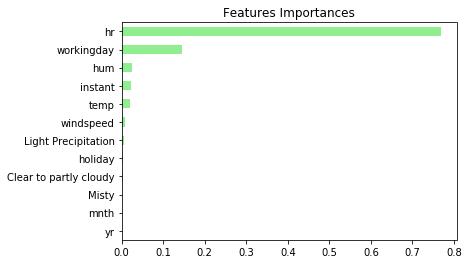

In [0]:
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

## 4. Boosting

Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors. In this chapter, you'll be introduced to the two boosting methods of AdaBoost and Gradient Boosting.

#### Adaboost

**Define the AdaBoost classifier**

In the following exercises you'll revisit the Indian Liver Patient dataset which was introduced in a previous chapter. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, you'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

As a first step, you'll start by instantiating an AdaBoost classifier.

In [0]:
X_train = df_raw[X_columns].iloc[train_idx]
X_test = df_raw[X_columns].iloc[test_idx]

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (463, 10)
X_test shape:  (116, 10)


In [0]:
X_train.head(5)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_male
150,56,1.1,0.5,180,30,42,6.9,3.8,1.2,1
377,20,0.6,0.2,202,12,13,6.1,3.0,0.9,0
473,42,1.0,0.3,154,38,21,6.8,3.9,1.3,1
285,13,1.5,0.5,575,29,24,7.9,3.9,0.9,1
358,37,0.7,0.2,176,28,34,5.6,2.6,0.8,1


In [0]:
#@title
train = '''
150    0
377    0
473    0
285    1
358    1
291    0
562    1
518    1
394    1
282    1
371    0
239    1
100    0
224    1
106    0
580    1
468    1
546    1
292    1
2      1
147    1
114    0
337    1
496    1
547    1
438    1
315    0
40     1
148    1
335    1
400    0
170    1
540    0
354    1
469    1
393    1
328    0
117    1
58     1
460    1
186    1
163    1
179    1
300    0
97     1
45     0
216    0
467    0
527    1
227    1
0      1
462    1
153    0
511    1
30     1
297    0
386    0
482    1
259    1
457    0
82     0
310    1
374    0
265    0
448    1
280    1
375    1
299    0
536    1
305    0
272    1
144    1
491    0
296    1
169    1
373    0
524    0
388    1
490    1
126    1
189    0
89     1
364    0
142    1
539    0
512    0
190    1
450    1
456    0
274    1
204    0
501    1
146    1
307    1
57     0
421    0
332    1
495    0
525    0
319    0
425    1
91     1
246    1
487    1
360    1
287    0
321    1
529    1
446    1
370    1
42     0
187    1
149    1
413    0
129    1
104    1
214    1
442    1
568    1
513    1
173    1
530    0
499    1
244    1
167    1
258    0
284    1
557    1
128    1
269    1
576    1
231    1
69     0
75     0
348    1
109    0
268    1
503    1
356    1
382    1
36     0
389    1
137    1
29     0
171    1
81     1
302    1
498    1
264    0
262    1
162    1
573    1
228    0
361    0
273    1
522    1
218    0
368    1
90     1
542    0
156    1
15     0
561    1
553    1
308    1
434    0
208    1
309    1
322    1
567    1
113    1
384    1
276    0
551    0
256    1
184    1
155    1
534    0
41     0
577    1
222    1
199    1
35     1
549    1
53     1
92     1
232    1
422    1
220    1
363    0
432    1
333    0
526    1
215    0
59     0
401    1
240    0
198    0
569    1
347    1
101    0
427    1
338    1
443    1
24     0
500    1
277    1
402    1
531    1
447    1
550    1
79     1
188    1
55     1
329    0
516    1
243    1
110    0
166    1
420    1
538    1
416    1
404    1
263    1
13     1
437    1
520    1
107    0
64     1
122    0
211    1
27     1
552    1
217    1
248    1
267    1
247    1
304    1
206    1
203    0
428    0
372    1
582    0
261    1
165    1
294    1
581    1
381    1
70     1
130    1
327    0
435    0
357    1
177    1
563    1
4      1
138    1
471    0
230    0
185    0
289    1
451    1
555    1
37     1
463    1
200    1
379    0
95     1
71     1
313    0
464    0
21     1
123    1
46     1
349    0
99     1
76     1
578    0
94     1
444    0
497    1
6      1
154    1
505    1
38     1
120    1
554    1
164    1
336    1
105    0
545    0
201    1
1      1
275    0
233    1
543    1
298    1
318    1
392    1
481    1
510    0
395    0
514    1
541    0
266    1
431    0
10     1
131    0
397    1
226    1
323    0
399    1
54     1
52     1
196    1
423    0
205    1
403    0
161    1
61     1
362    0
158    1
255    1
533    1
415    1
135    1
343    1
7      1
519    1
14     1
316    0
517    1
194    0
479    1
575    1
20     1
484    1
17     0
579    1
257    1
192    1
136    1
245    1
380    1
293    0
515    1
43     1
44     0
376    1
502    1
477    1
140    0
51     1
387    1
251    1
353    1
488    0
11     1
492    1
172    1
544    1
96     1
436    1
521    1
22     1
182    0
571    1
560    1
486    1
124    0
295    1
212    0
559    1
73     1
418    1
355    0
195    1
127    1
254    0
234    1
219    1
331    1
67     1
408    1
342    0
145    0
77     1
193    0
235    1
341    1
25     1
5      1
49     1
478    1
115    0
439    1
56     0
556    1
3      1
8      0
340    1
278    1
260    1
87     1
369    1
351    1
504    1
414    0
572    1
19     1
334    1
23     1
566    0
406    0
410    1
506    1
532    0
290    1
83     1
175    1
449    1
537    1
452    1
383    0
88     1
345    1
108    0
159    1
143    1
132    0
116    1
485    1
18     1
28     0
168    1
433    0
16     1
344    0
412    1
80     1
93     1
507    1
417    0
250    1
398    1
459    1
378    1
98     1
34     0
326    0
65     1
183    1
221    1
570    1
366    0
133    1
197    1
60     1
112    0
455    1
84     1
367    0
176    1
'''

y_train = pd.read_csv(pd.compat.StringIO(train), header=None, index_col=0, sep='\s+')

print('y_train shape: ', y_train.shape)

y_train shape:  (463, 1)


In [0]:
#@title
test = '''
480    0
440    1
311    1
441    1
31     1
121    1
118    1
236    0
288    1
429    1
271    0
134    1
202    0
385    1
279    1
62     1
181    1
346    1
86     0
102    1
339    1
359    0
229    1
461    1
238    0
419    1
320    1
476    1
237    1
281    0
32     0
174    1
78     0
483    0
493    0
33     0
396    1
12     0
160    1
466    0
9      1
548    1
409    1
242    1
535    1
325    0
317    1
411    0
85     1
50     1
458    1
430    1
558    1
324    1
523    1
66     1
223    0
426    0
103    0
286    1
350    1
207    1
141    1
330    1
494    1
314    1
424    1
405    1
119    1
283    0
574    1
489    0
470    1
528    1
565    1
26     1
74     1
445    0
390    1
249    1
72     1
465    0
391    1
225    1
365    0
68     1
407    1
139    1
252    0
63     1
178    1
270    1
303    0
39     1
191    1
453    1
306    1
125    0
47     1
472    0
111    1
151    1
475    0
180    1
301    1
509    1
454    0
152    1
210    1
48     1
213    1
157    1
564    0
508    1
474    0
352    1
'''

y_test = pd.read_csv(pd.compat.StringIO(test), header=None, index_col=0, sep='\s+')

print('y_test shape: ', y_test.shape)

y_test shape:  (116, 1)


In [0]:
y_test.head(5)

,1
0,
480,0
440,1
311,1
441,1
31,1


In [0]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

- Instantiate a DecisionTreeClassifier with max_depth set to 2.

- Instantiate an AdaBoostClassifier consisting of 180 trees and setting the base_estimator to dt.

In [0]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

In [0]:
# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

**Train the AdaBoost classifier**

Now that you've instantiated the AdaBoost classifier ada, it's time train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows:

Once the classifier ada is trained, call the .predict_proba() method by passing X_test as a parameter and extract these probabilities by slicing all the values in the second column as follows:

> ada.predict_proba(X_test)[:,1]

In [0]:
# Fit ada to the training set
ada.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=1,
                                

In [0]:
# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

**Evaluate the AdaBoost classifier**

Now that you're done training ada and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate ada's ROC AUC score. 

In [0]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

In [0]:
# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

In [0]:
# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.72


#### Gradient Boosting (GB)

**Define the GB regressor**

You'll now revisit the Bike Sharing Demand dataset that was introduced in the previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.

As a first step, you'll start by instantiating a gradient boosting regressor which you will train in the next exercise.

In [0]:
X_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0, header=None)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0, header=None)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1190, 12)
X_test shape:  (298, 12)
y_train shape:  (1190, 1)
y_test shape:  (298, 1)


In [0]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

Instantiate a gradient boosting regressor by setting the parameters:

- max_depth to 4

- n_estimators to 200

In [0]:
# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

**Train the GB regressor**

You'll now train the gradient boosting regressor gb that you instantiated in the previous exercise and predict test set labels.

In [0]:
# Fit gb to the training set
gb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=2,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [0]:
# Predict test set labels
y_pred = gb.predict(X_test)

**Evaluate the GB regressor**

Now that the test set predictions are available, you can use them to evaluate the test set Root Mean Squared Error (RMSE) of gb.

In [0]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

In [0]:
# Compute MSE
mse_test = MSE(y_test, y_pred)

In [0]:
# Compute RMSE
rmse_test = mse_test**(1/2)

In [0]:
# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 52.067


#### Stochastic Gradient Boosting (SGD)

**Regression with SGB**

As in the exercises from the previous lesson, you'll be working with the Bike Sharing Demand dataset. In the following set of exercises, you'll solve this bike count regression problem using stochastic gradient boosting.

In [0]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

Instantiate a Stochastic Gradient Boosting Regressor (SGBR) and set:

- max_depth to 4 and n_estimators to 200,

- subsample to 0.9, and

- max_features to 0.75.

In [0]:
# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9, # in addition to previous GB regressor
            max_features=0.75, #
            n_estimators=200,                                
            random_state=2)

**Train the SGB regressor**

In this exercise, you'll train the SGBR sgbr instantiated in the previous exercise and predict the test set labels.

In [0]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=0.75, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=2,
                          subsample=0.9, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [0]:
# Predict test set labels
y_pred = sgbr.predict(X_test)

**Evaluate the SGB regressor**

You have prepared the ground to determine the test set RMSE of sgbr which you shall evaluate in this exercise.

In [0]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

In [0]:
# Compute test set MSE
mse_test = MSE(y_test, y_pred)

In [0]:
# Compute test set RMSE
rmse_test = mse_test**(1/2)

In [0]:
# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 49.759


## 5. Model Tuning

The hyperparameters of a machine learning model are parameters that are not learned from data. They should be set prior to fitting the model to the training set. In this chapter, you'll learn how to tune the hyperparameters of a tree-based model using grid search cross validation.

In [0]:
# retrieve dataset

df = pd.read_csv('indian_liver_patient_preprocessed.csv')
df.head(5)

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [0]:
X_cols = ['Unnamed: 0', 'Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std',
       'Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std',
       'Aspartate_Aminotransferase_std', 'Total_Protiens_std', 'Albumin_std',
       'Albumin_and_Globulin_Ratio_std', 'Is_male_std']

In [0]:
#@title
ind_test = [476,
 436,
 308,
 437,
 31,
 121,
 118,
 235,
 285,
 425,
 268,
 134,
 202,
 381,
 276,
 62,
 181,
 342,
 86,
 102,
 335,
 355,
 228,
 457,
 237,
 415,
 316,
 472,
 236,
 278,
 32,
 174,
 78,
 479,
 489,
 33,
 392,
 12,
 160,
 462,
 9,
 544,
 405,
 240,
 531,
 321,
 313,
 407,
 85,
 50,
 454,
 426,
 554,
 320,
 519,
 66,
 222,
 422,
 103,
 283,
 346,
 207,
 141,
 326,
 490,
 310,
 420,
 401,
 119,
 280,
 570,
 485,
 466,
 524,
 561,
 26,
 74,
 441,
 386,
 247,
 72,
 461,
 387,
 224,
 361,
 68,
 403,
 139,
 250,
 63,
 178,
 267,
 300,
 39,
 191,
 449,
 303,
 125,
 47,
 468,
 111,
 151,
 471,
 180,
 298,
 505,
 450,
 152,
 209,
 48,
 212,
 157,
 560,
 504,
 470,
 348]

print('Test indices length: ', len(ind_test))

Test indices length:  116


In [0]:
X_test = df[X_cols].iloc[ind_test]
y_test = df['Liver_disease'].iloc[ind_test]

print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

In [0]:
X_test.head(5)

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std
476,480,-2.331128,-0.452462,-0.495414,0.249162,-0.290267,-0.205161,1.308759,1.337307,0.478949,1
436,440,0.260222,-0.404249,-0.459878,-0.383668,-0.317586,-0.312205,0.478274,1.463292,1.731627,0
308,311,0.568716,3.195685,3.946558,1.161423,-0.208311,-0.218973,0.662826,0.455416,-0.147390,0
437,441,-0.171670,-0.163182,-0.140056,0.002605,-0.284804,-0.246597,-2.197733,-1.686321,-0.773729,0
31,31,0.445318,-0.388178,-0.459878,-0.556258,-0.252021,-0.229332,-1.459525,-0.300492,1.418457,1


In [0]:
y_test.head(5)

476    0
436    1
308    1
437    1
31     1
Name: Liver_disease, dtype: int64

In [0]:
#@title
ind_train = list(set(df.index.tolist()) - set(ind_test))

print('Train indices length: ', len(ind_train))


Train indices length:  463


In [0]:
X_train = df[X_cols].iloc[ind_train]
y_train = df['Liver_disease'].iloc[ind_train]


print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (463, 11)
y_train shape:  (463,)


In [0]:
# dt for chapter 5

dt = DecisionTreeClassifier(max_depth=None, criterion='gini', random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In the following exercises you'll revisit the Indian Liver Patient dataset which was introduced in a previous chapter.

Your task is to tune the hyperparameters of a classification tree. Given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

We have instantiated a DecisionTreeClassifier and assigned to dt with sklearn's default hyperparameters. You can inspect the hyperparameters of dt in your console.

#### Tuning a CART's Hyperparameters

**Set the tree's hyperparameter grid**

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree dt and find the optimal classifier in the next exercise.

In [0]:
# Define params_dt
params_dt = {
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]
}

**Search for the optimal tree**

In this exercise, you'll perform grid search using 5-fold cross validation to find dt's optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. 

In [0]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [0]:
# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

In [0]:
# extra, datacamp has already done this before next exercise
grid_dt.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             pre_dis

**Evaluate the optimal tree**

In this exercise, you'll evaluate the test set ROC AUC score of grid_dt's optimal model.

In [0]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

In [0]:
# Extract the best estimator
best_model = grid_dt.best_estimator_

In [0]:
# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

In [0]:
y_pred_proba

array([0.74193548, 0.44827586, 0.97029703, 0.74193548, 0.65079365,
       0.86440678, 0.86440678, 0.86440678, 0.74193548, 0.97029703,
       0.86440678, 0.80357143, 0.44827586, 0.65079365, 0.44827586,
       0.65079365, 0.97029703, 0.44827586, 0.74193548, 0.86440678,
       0.97029703, 0.65079365, 0.74193548, 0.86440678, 0.375     ,
       0.97029703, 0.375     , 0.74193548, 0.375     , 0.44827586,
       0.44827586, 0.375     , 0.44827586, 0.375     , 0.74193548,
       0.86440678, 0.65079365, 0.97029703, 0.97029703, 0.375     ,
       0.97029703, 0.97029703, 0.97029703, 0.375     , 0.97029703,
       0.44827586, 0.375     , 0.74193548, 0.86440678, 0.44827586,
       0.80357143, 0.65079365, 0.97029703, 0.80357143, 0.44827586,
       0.80357143, 0.44827586, 0.65079365, 0.74193548, 0.375     ,
       0.80357143, 0.97029703, 0.80357143, 0.80357143, 0.375     ,
       0.80357143, 0.74193548, 0.74193548, 0.86440678, 0.74193548,
       0.86440678, 0.65079365, 0.65079365, 0.74193548, 0.80357

In [0]:
# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

In [0]:
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.614


#### Tuning a RF's Hyperparameters

**Random forests hyperparameters**

In the following exercises, you'll be revisiting the Bike Sharing Demand dataset that was introduced in a previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be tuning the hyperparameters of a Random Forests regressor.

In [0]:
# rf fore chapter 5
rf = RandomForestRegressor(n_estimators=10, random_state=2)
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

**Set the hyperparameter grid of RF**

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune rf's hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

In [0]:
# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators': [100, 350, 500],
    'max_features': [ 'log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30]
}

**Search for the optimal forest**

In this exercise, you'll perform grid search using 3-fold cross validation to find rf's optimal hyperparameters. To evaluate each model in the grid, you'll be using the negative mean squared error metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. 

In [0]:
# Import GridSearchCV
from sklearn.model_selection import  GridSearchCV

In [0]:
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [0]:
# extra 
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   16.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt']

**Evaluate the optimal forest**

In this last exercise of the course, you'll evaluate the test set RMSE of grid_rf's optimal model.

In [0]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

In [0]:
# Extract the best estimator
best_model = grid_rf.best_estimator_

In [0]:
# Predict test set labels
y_pred = best_model.predict(X_test)

In [0]:
y_pred

array([0.68011984, 0.50442298, 0.91332868, 0.84638351, 0.57416258,
       0.94921552, 0.91680088, 0.7182615 , 0.7270719 , 0.9234817 ,
       0.82831887, 0.57848542, 0.50432073, 0.49084688, 0.6104532 ,
       0.60655979, 0.82967409, 0.49937205, 0.69515297, 0.64621367,
       0.74913355, 0.63366755, 0.65500137, 0.63662272, 0.52966171,
       0.96528323, 0.43841657, 0.65926341, 0.50150127, 0.50362483,
       0.51275988, 0.51810587, 0.52617655, 0.59586818, 0.67639302,
       0.88356581, 0.53141431, 0.84060425, 0.94854292, 0.49285423,
       0.82002743, 0.93288413, 0.95638022, 0.46352981, 0.93472514,
       0.52306113, 0.54889115, 0.80534339, 0.73954074, 0.55243612,
       0.69145481, 0.56032768, 0.94007085, 0.75507431, 0.49364594,
       0.80601361, 0.52156211, 0.69752472, 0.63329808, 0.47986946,
       0.75710897, 0.92669539, 0.74320735, 0.76990716, 0.64798598,
       0.6924174 , 0.61464506, 0.57151604, 0.91881933, 0.68166578,
       0.93548245, 0.50599035, 0.59645668, 0.82557932, 0.84680

In [0]:
# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

In [0]:
# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 0.449
